In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('../data_processing/cleaned-data.csv', index_col=0)

y = df.G3.values
X = df.drop(['G1', 'G2', 'G3', 'improved', 'passed'], axis=1).values

categories = [np.array(['GP', 'MS'], dtype=object),
                np.array(['F', 'M'], dtype=object),
                np.array(np.arange(10, 30, 1), dtype=object),
                np.array(['R', 'U'], dtype=object),
                np.array(['GT3', 'LE3'], dtype=object),
                np.array(['A', 'T'], dtype=object),
                np.array([0, 1, 2, 3, 4], dtype=object),
                np.array([0, 1, 2, 3, 4], dtype=object),
                np.array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
                np.array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
                np.array(['course', 'home', 'other', 'reputation'], dtype=object),
                np.array(['father', 'mother', 'other'], dtype=object),
                np.array([1, 2, 3, 4], dtype=object),
                np.array([1, 2, 3, 4], dtype=object),
                np.array([0, 1, 2, 3], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array(np.arange(0, 100, 1),
                dtype=object)]
print(X.shape, y.shape)

(357, 30) (357,)


In [3]:
# Setup the pipeline steps: steps
steps = [('ohe', OneHotEncoder(categories=categories)),
         ('norm', Normalizer(copy=True, norm='l1')),
         ('adab', AdaBoostClassifier(base_estimator=None, algorithm='SAMME.R', random_state=0))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'adab__learning_rate': np.arange(0.09, 0.1, 0.001),
             'adab__n_estimators': np.arange(500, 1000, 100)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the GridSearchCV object: yeg_cv
grade_predict_cv = GridSearchCV(pipeline, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

# Fit to the training set
grade_predict_cv.fit(X_train, y_train)

# Compute and print the metrics
mse = grade_predict_cv.score(X_test, y_test)
print("Tuned adaBoost estimators: {}".format(grade_predict_cv.best_params_))
print("Tuned adaBoost Mean Squared Error: {}".format(mse))
print('Mean Error:', np.sqrt(abs(mse)))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned adaBoost estimators: {'adab__learning_rate': 0.096, 'adab__n_estimators': 600}
Tuned adaBoost Mean Squared Error: -17.925925925925927
Mean Error: 4.233901974057256


# Logistic Regression Model

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
y2 = df.passed.values
y2.reshape(-1, 1)

print(y[0:5])

[ 6  6 10 15 10]


In [6]:
# Setup the pipeline steps: steps
steps = [('ohe', OneHotEncoder(categories=categories)),
         ('logit', LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto'))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'logit__C': np.arange(0.1, 2, 0.05),
             'logit__tol': np.arange(0.00005, 0.001, 0.0001)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=0)

# Create the GridSearchCV object: yeg_cv
pass_predict_cv = GridSearchCV(pipeline, param_grid=parameters, scoring='roc_auc', cv=10)

# Fit to the training set
pass_predict_cv.fit(X_train, y_train)

# Compute and print the metrics
auc = pass_predict_cv.score(X_test, y_test)
print("Tuned Logistic Regression estimators: {}".format(pass_predict_cv.best_params_))
print("Tuned Logistic Regression Area Under the Curve: {}".format(auc))

Tuned Logistic Regression estimators: {'logit__C': 0.30000000000000004, 'logit__tol': 5e-05}
Tuned Logistic Regression Area Under the Curve: 0.6473155827149717


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


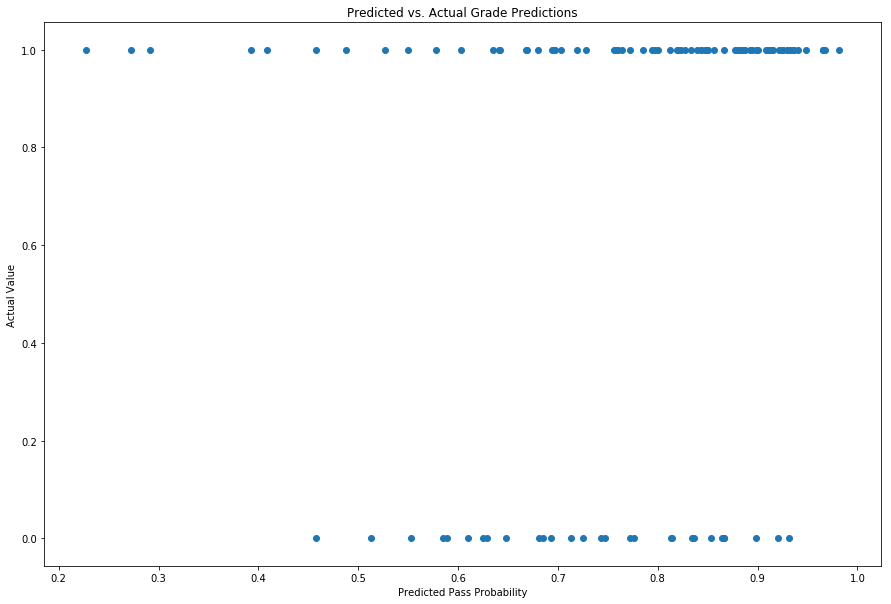

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

x_axis = pass_predict_cv.predict_proba(X_test)
y_axis = y_test

fig = plt.figure(figsize=(15,10))
plt.scatter(x_axis[:, 1], y_axis)
plt.xlabel('Predicted Pass Probability')
plt.ylabel('Actual Value')
plt.title('Predicted vs. Actual Grade Predictions')

plt.show()

# Random Forest Regressor

In [8]:
# Setup the pipeline steps: steps
steps = [('ohe', OneHotEncoder(categories=categories)),
         ('rfr', RandomForestRegressor(max_depth=20, criterion='mse'))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'rfr__n_estimators': np.arange(100, 300, 10)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the GridSearchCV object: yeg_cv
reg_predict_cv = GridSearchCV(pipeline, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)

# Fit to the training set
reg_predict_cv.fit(X_train, y_train)

# Compute and print the metrics
mse = reg_predict_cv.score(X_test, y_test)
print("Tuned RandomForest estimators: {}".format(reg_predict_cv.best_params_))
print("Tuned RandomForest mean squared error: {}".format(mse))
print(np.sqrt(abs(mse)))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned RandomForest estimators: {'rfr__n_estimators': 150}
Tuned RandomForest mean squared error: -9.92986530303067
3.1511688788496675


In [9]:
x_axis = reg_predict_cv.predict(X_test)
y_axis = y_test

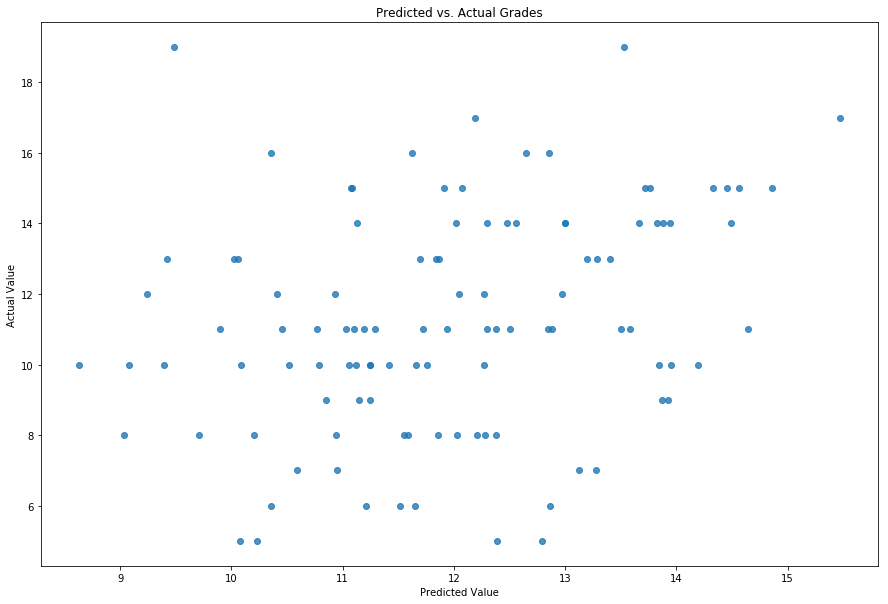

In [10]:
fig = plt.figure(figsize=(15,10))
plt.scatter(x_axis, y_axis, alpha=0.8)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Predicted vs. Actual Grades')
plt.show()

In [11]:
X3 = df.drop(['G2', 'G3', 'passed', 'improved'], axis=1).values
y = df.G3.values
print(X.shape, y.shape)

categories3 = [np.array(['GP', 'MS'], dtype=object),
                np.array(['F', 'M'], dtype=object),
                np.array(np.arange(10, 30, 1), dtype=object),
                np.array(['R', 'U'], dtype=object),
                np.array(['GT3', 'LE3'], dtype=object),
                np.array(['A', 'T'], dtype=object),
                np.array([0, 1, 2, 3, 4], dtype=object),
                np.array([0, 1, 2, 3, 4], dtype=object),
                np.array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
                np.array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
                np.array(['course', 'home', 'other', 'reputation'], dtype=object),
                np.array(['father', 'mother', 'other'], dtype=object),
                np.array([1, 2, 3, 4], dtype=object),
                np.array([1, 2, 3, 4], dtype=object),
                np.array([0, 1, 2, 3], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array(np.arange(0, 100, 1),
                   dtype=object),
                np.array(np.arange(0, 20, 1),
                   dtype=object)]

(357, 30) (357,)


In [12]:
# Setup the pipeline steps: steps
steps = [('ohe', OneHotEncoder(categories=categories3)),
         ('rfr', RandomForestRegressor(max_depth=20, criterion='mse'))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'rfr__n_estimators': np.arange(150, 250, 10)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=0)

# Create the GridSearchCV object: yeg_cv
first_predict_cv = GridSearchCV(pipeline, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)

# Fit to the training set
first_predict_cv.fit(X_train, y_train)

# Compute and print the metrics
mse = first_predict_cv.score(X_test, y_test)
print("Tuned RandomForest estimators: {}".format(first_predict_cv.best_params_))
print("Tuned RandomForest mean squared error: {}".format(mse))
print(np.sqrt(abs(mse)))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned RandomForest estimators: {'rfr__n_estimators': 170}
Tuned RandomForest mean squared error: -2.4973872553083627
1.5803123916834807


In [13]:
x1_axis = first_predict_cv.predict(X_test)
y_axis = y_test

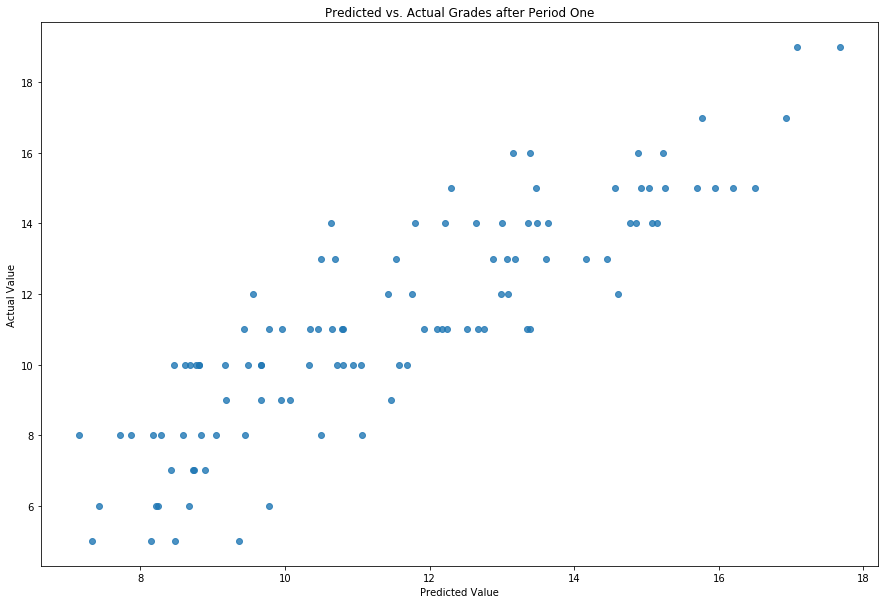

In [14]:
fig = plt.figure(figsize=(15,10))
plt.scatter(x1_axis, y_axis, alpha=0.8)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Predicted vs. Actual Grades after Period One')
plt.show()

In [15]:
X2 = df.drop(['G3', 'passed'], axis=1).values
y = df.G3.values
print(X.shape, y.shape)

categories2 = [np.array(['GP', 'MS'], dtype=object),
                np.array(['F', 'M'], dtype=object),
                np.array(np.arange(10, 30, 1), dtype=object),
                np.array(['R', 'U'], dtype=object),
                np.array(['GT3', 'LE3'], dtype=object),
                np.array(['A', 'T'], dtype=object),
                np.array([0, 1, 2, 3, 4], dtype=object),
                np.array([0, 1, 2, 3, 4], dtype=object),
                np.array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
                np.array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
                np.array(['course', 'home', 'other', 'reputation'], dtype=object),
                np.array(['father', 'mother', 'other'], dtype=object),
                np.array([1, 2, 3, 4], dtype=object),
                np.array([1, 2, 3, 4], dtype=object),
                np.array([0, 1, 2, 3], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array(['no', 'yes'], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array([1, 2, 3, 4, 5], dtype=object),
                np.array(np.arange(0, 100, 1),
                   dtype=object),
                np.array(np.arange(0, 20, 1),
                   dtype=object),
                np.array(np.arange(0, 20, 1),
                   dtype=object),
                np.array([0, 1], dtype=object)]

(357, 30) (357,)


In [16]:
# Setup the pipeline steps: steps
steps = [('ohe', OneHotEncoder(categories=categories2)),
         ('rfr', RandomForestRegressor(max_depth=20, criterion='mse'))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'rfr__n_estimators': np.arange(150, 250, 10)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

# Create the GridSearchCV object: yeg_cv
second_predict_cv = GridSearchCV(pipeline, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)

# Fit to the training set
second_predict_cv.fit(X_train, y_train)

# Compute and print the metrics
mse = second_predict_cv.score(X_test, y_test)
print("Tuned RandomForest estimators: {}".format(second_predict_cv.best_params_))
print("Tuned RandomForest mean squared error: {}".format(mse))
print(np.sqrt(abs(mse)))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned RandomForest estimators: {'rfr__n_estimators': 160}
Tuned RandomForest mean squared error: -1.0287270332661438
1.014261816922112


In [17]:
x1_axis = second_predict_cv.predict(X_test)
y_axis = y_test

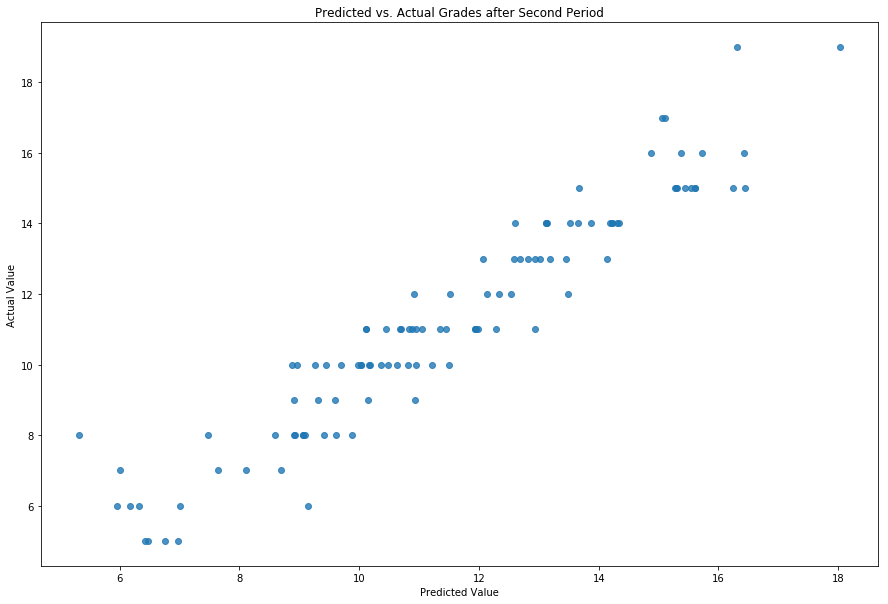

In [18]:
fig = plt.figure(figsize=(15,10))
plt.scatter(x1_axis, y_axis, alpha=0.8)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Predicted vs. Actual Grades after Second Period')
plt.show()

# Ordinal Logistic Regression

In [19]:
from mord import LogisticIT

In [20]:
# Setup the pipeline steps: steps
steps = [('ohe', OneHotEncoder(categories=categories)),
         ('lit', LogisticIT())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'lit__alpha': np.arange(0, 5, 0.1)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the GridSearchCV object: yeg_cv
pass_predict_cv = GridSearchCV(pipeline, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)

# Fit to the training set
pass_predict_cv.fit(X_train, y_train)

# Compute and print the metrics
mse = pass_predict_cv.score(X_test, y_test)
print("Tuned LogisticIT estimators: {}".format(pass_predict_cv.best_params_))
print("Tuned LogisticIT mean squared error: {}".format(mse))
print(np.sqrt(abs(mse)))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned LogisticIT estimators: {'lit__alpha': 4.800000000000001}
Tuned LogisticIT mean squared error: -11.88888888888889
3.4480268109295333
